In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

def generate_shepard_tone(fundamental=440.0, duration=10, sr=44100):
    # Create time array
    t = np.linspace(0, duration, int(sr * duration))

    # Use float numbers for the calculation
    frequencies = fundamental * (2.0 ** np.arange(-6.0, 4.0))

    # Generate sinusoids for each frequency
    tone = np.zeros_like(t)

    # Create Gaussian envelope
    gaussian = np.exp(-0.5 * ((np.log2(frequencies/fundamental)) ** 2))

    # Generate and add together sine waves
    for f, amp in zip(frequencies, gaussian):
        tone += amp * np.sin(2 * np.pi * f * t)

    # Normalize
    tone = tone / np.max(np.abs(tone))

    return tone, sr

# Generate a Shepard tone
shepard_tone, sr = generate_shepard_tone()

[   6.875   13.75    27.5     55.     110.     220.     440.     880.
 1760.    3520.   ]


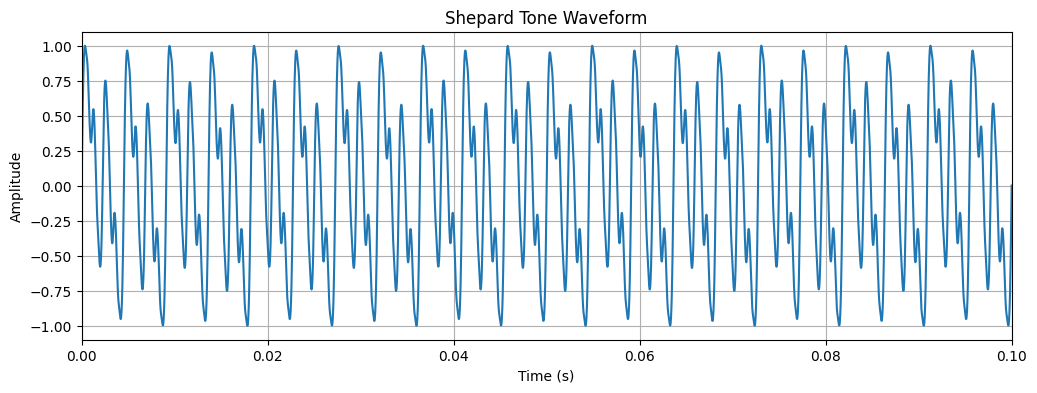

In [12]:
# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, 10, len(shepard_tone)), shepard_tone)
plt.title('Shepard Tone Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, 0.1)
plt.show()

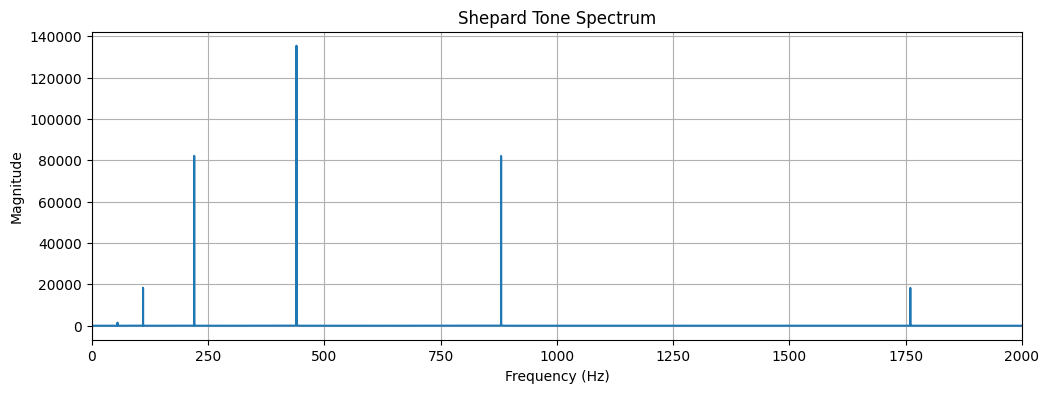

In [15]:
# Compute and plot the spectrum
plt.figure(figsize=(12, 4))
f = np.fft.fftfreq(len(shepard_tone), 1 / sr)
spectrum = np.abs(np.fft.fft(shepard_tone))
plt.plot(f[:len(f) // 2], spectrum[:len(spectrum) // 2])
plt.title('Shepard Tone Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 2000)
plt.show()


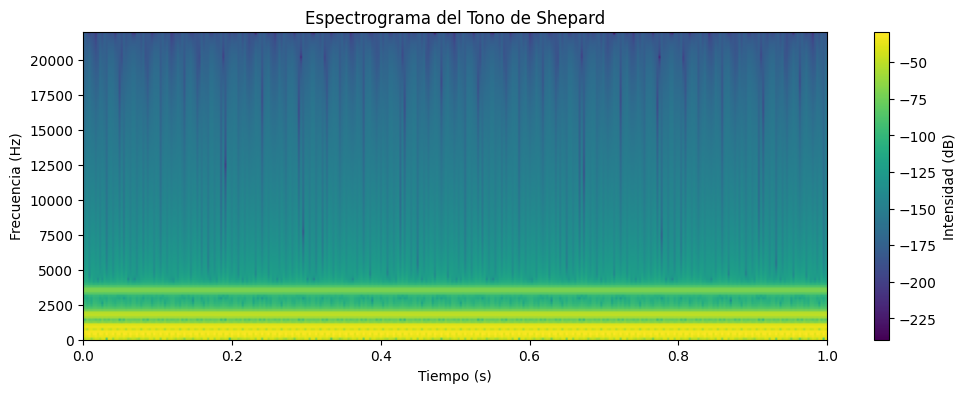

In [30]:
plt.figure(figsize=(12, 4))
plt.specgram(shepard_tone, Fs=sr)
plt.title('Espectrograma del Tono de Shepard')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.xlim(0, 1)
plt.show()


In [5]:
# Play the sound
Audio(shepard_tone, rate=sr)